**Prática de Segmentação de imagens**

In [3]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

1) Faça a plotagem do histograma da imagem, observando o histograma, escolha um valor para definir um threshold

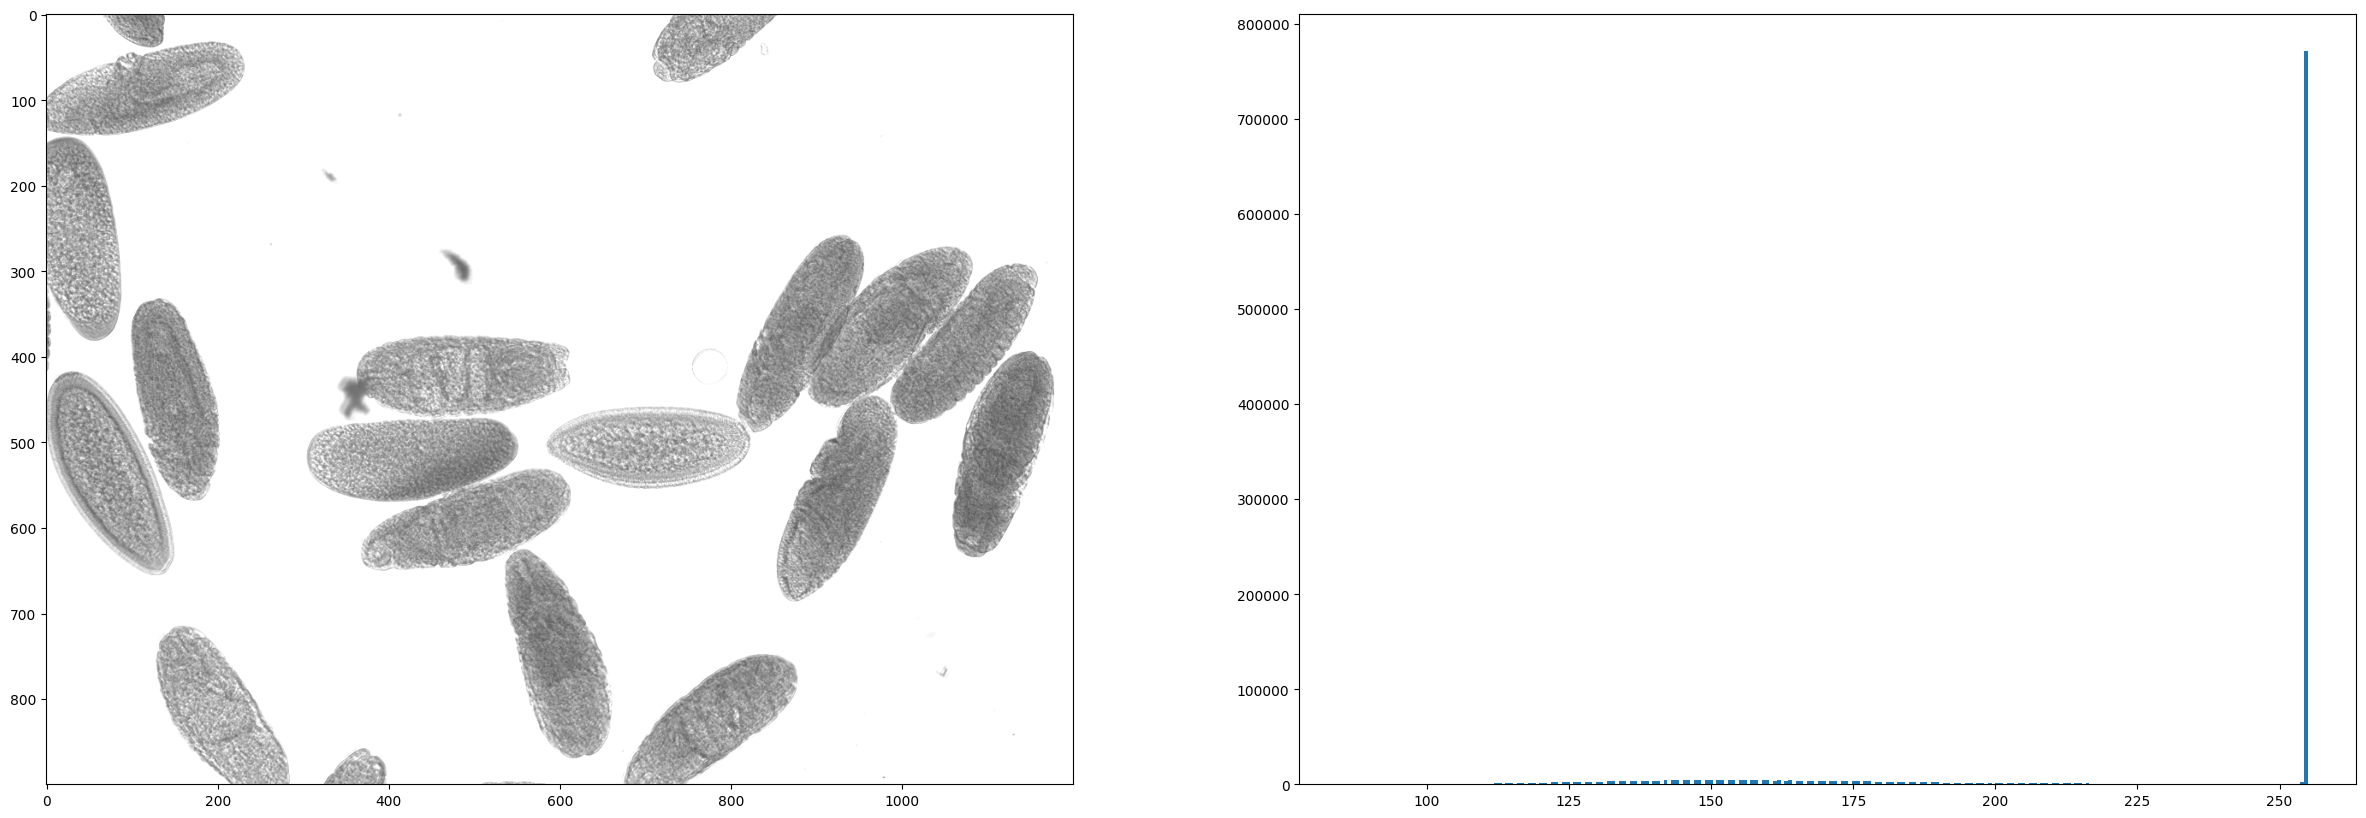

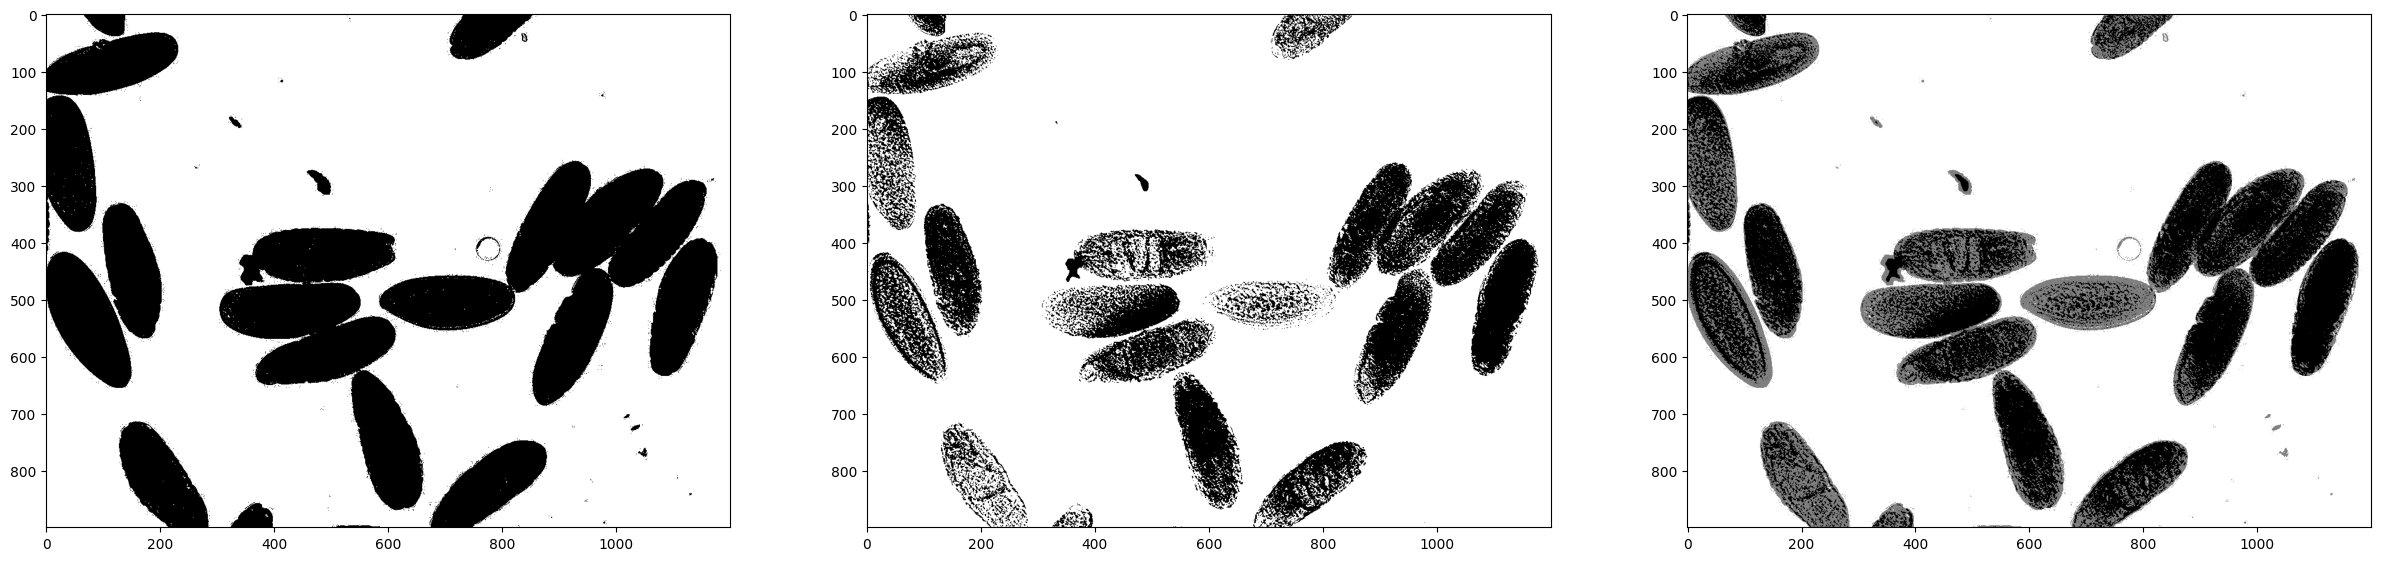

In [83]:
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(30, 10))
plt.subplot(1,2,1)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
#print(min(img1.flatten())) = 86
plt.hist(img1.flatten(), bins=255, range=[86, 255])

#threshholding

#th com branco e não branco
imgT = img1.copy()
imgT[img1 < 255] = 0

#th com corte em 170
imgT2 = img1.copy()
imgT2[img1 >= 170] = 255
imgT2[img1 < 170] = 0

#th com 3 cores e corte em 170 ignorando o branco
imgT3 = img1.copy()
imgT3[img1 < 255] = 127
imgT3[img1 < 170] = 0

plt.figure(figsize=(30, 10))
plt.subplot(1,3,1)
plt.imshow(imgT, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,3,2)
plt.imshow(imgT2, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,3,3)
plt.imshow(imgT3, cmap='gray', vmin=0, vmax=255)

2)	Segmentação utilizando a técnica de Threshold Adaptativo (implementar o algortimo). Faça a aplicação do Threshold com e sem suavização prévia

treshold da imagem sem blur: 204.73979547385494
treshold da imagem com blur: 136.7504760762821


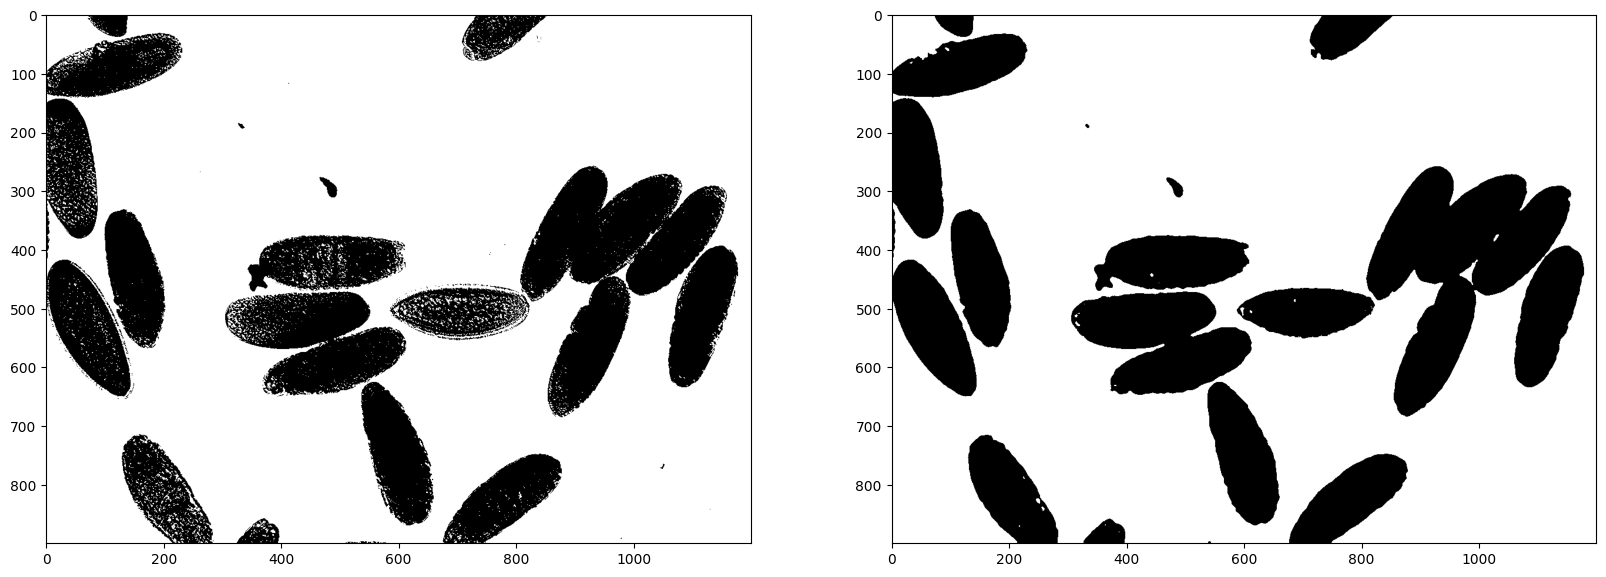

In [84]:
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

def adaptive_threshold(image, delta_t = 0.1):
    t = np.mean(image)
    while True:
        g1 = image[image > t]
        g2 = image[image < t]
        m1 = np.mean(g1)
        m2 = np.mean(g2)
        t_new = (m1 + m2 ) / 2
        if abs(t - t_new) < delta_t:
            break
        t = t_new
    return t

t = adaptive_threshold(img1, 0.1)
print(f'treshold da imagem sem blur: {t}')

img1[img1 > t] = 255
img1[img1 < t] = 0


#🧿 Usamos o do cv2 pq preguica de pegar o proprio 🧿
img2 = cv2.GaussianBlur(img1, (9,9), cv2.BORDER_DEFAULT)

t = adaptive_threshold(img2, 0.1)
print(f'treshold da imagem com blur: {t}')

img2[img2 > t] = 255
img2[img2 < t] = 0

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255);
plt.subplot(1,2,2)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255);



3) Segmentação utilizando a técnica de Otsu (implementar) . Faça a aplicação do Threshold com e sem suavização prévia. Mostre um gráfico com o histograma juntamente com a variância entre classes (Exemplo: https://en.wikipedia.org/wiki/File:Otsu%27s_Method_Visualization.gif)

threshold sem suavização: 253
threshold com suavização: 253


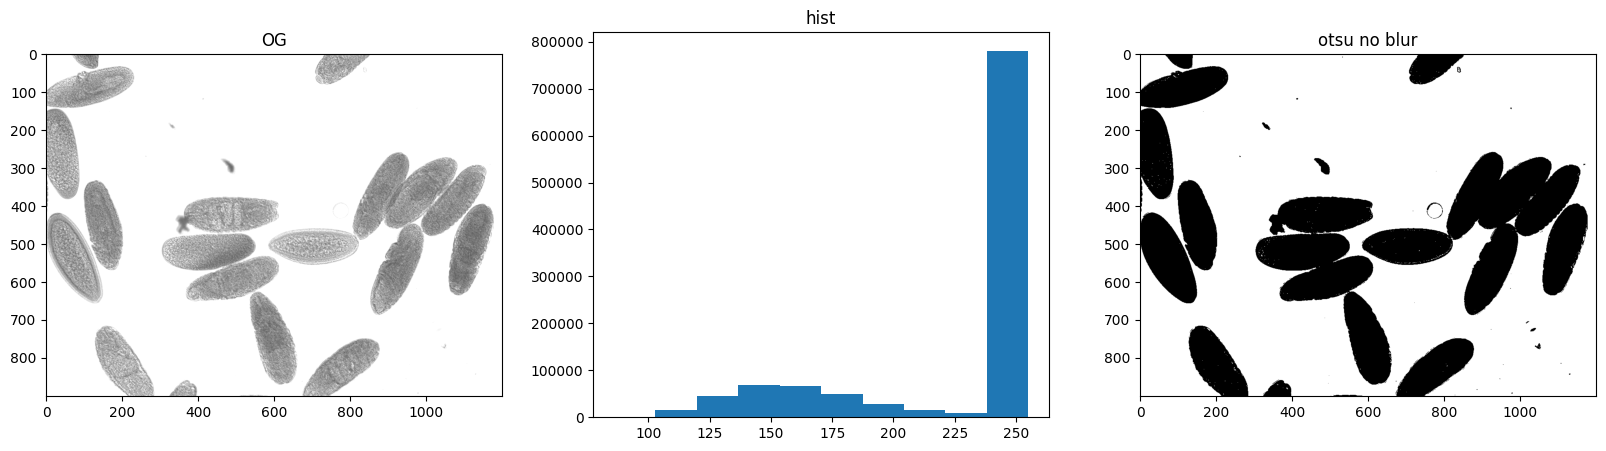

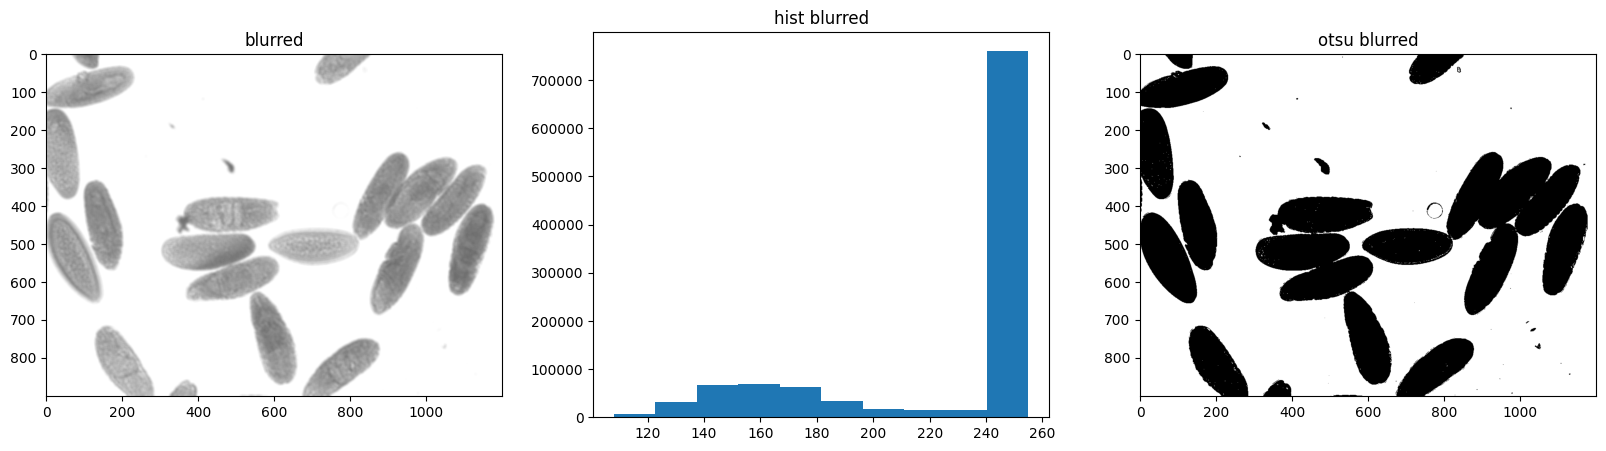

In [85]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def otsu(img, L):
    M, N = img.shape
    img_size = M * N
    
    hist, _ = np.histogram(img.flatten(), bins=L, range=[0, L])
    
    # normalizando o histograma
    pis = hist / img_size
    
    mg = np.sum(np.arange(L) * pis)    
    sig_G = np.sum(pis * (np.arange(L) - mg) ** 2)
    
    def eta(k):
        P1 = np.sum(pis[:k+1])
        P2 = np.sum(pis[k+1:])
        
        # evitando divisões por 0
        if P1 == 0 or P2 == 0:
            return 0
        
        return np.sum(np.arange(k+1) * pis[:k+1]) / (P1*P2)

    etas = [eta(i) for i in range(L)]
    return np.argmax(etas)

img = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

# sem suavização
k_og = otsu(img, 256)
print("threshold sem suavização:", k)
imgOtsu = img.copy()
imgOtsu[imgOtsu >= k_og] = 255
imgOtsu[imgOtsu < k_og] = 0

# com suavização
img2 = cv2.GaussianBlur(img, (9,9), cv2.BORDER_DEFAULT)
k_blur = otsu(img2, 256)
print("threshold com suavização:", k)
imgOtsu2 = img.copy()
imgOtsu2[imgOtsu2 >= k_blur] = 255
imgOtsu2[imgOtsu2 < k_blur] = 0

# PLOT SEM BLUR
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("OG")

plt.subplot(1, 3, 2)
plt.hist(img.flatten())
plt.title("hist")

plt.subplot(1, 3, 3)
plt.imshow(imgOtsu, cmap='gray', vmin=0, vmax=255)
plt.title("otsu no blur")

# PLOT COM BLUR
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.title("blurred")

plt.subplot(1, 3, 2)
plt.hist(img2.flatten())
plt.title("hist blurred")

plt.subplot(1, 3, 3)
plt.imshow(imgOtsu2, cmap='gray', vmin=0, vmax=255)
plt.title("otsu blurred")
plt.show()


4)	Aplique o Otsu para a imagem HE.jpg, madrill.tiff e  Lenna.jpg (use antes a conversão da imagem para tons de cinza)

Threshhold HE: 163
Threshhold madrill: 123
Threshhold Lenna: 133


Text(0.5, 1.0, 'Lenna.jpg Otsu')

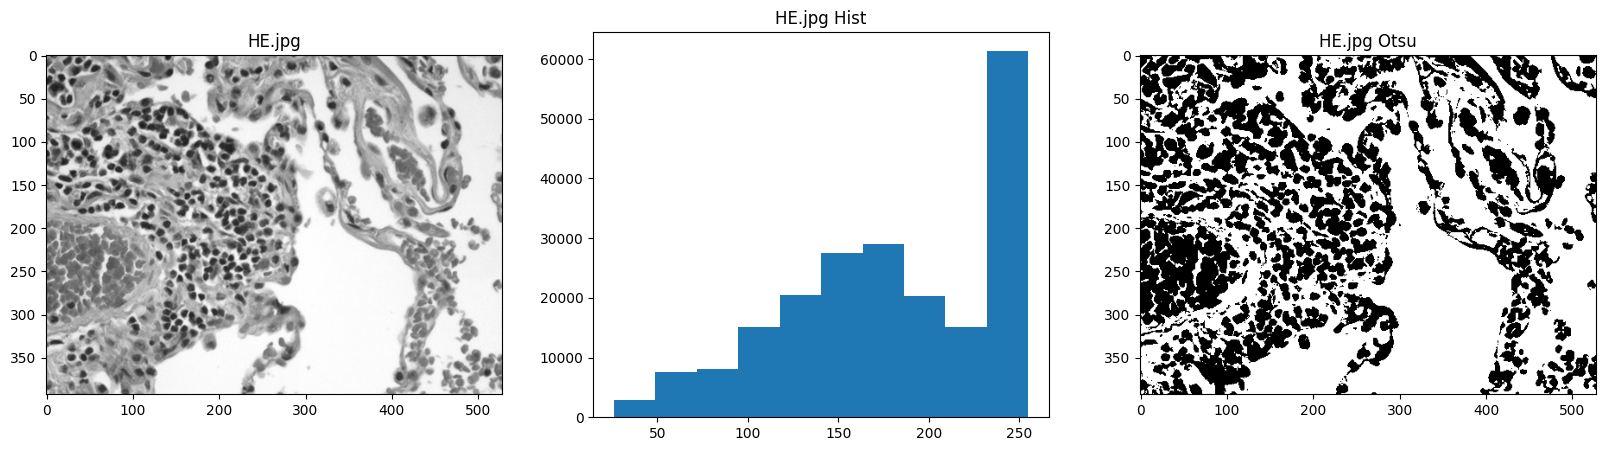

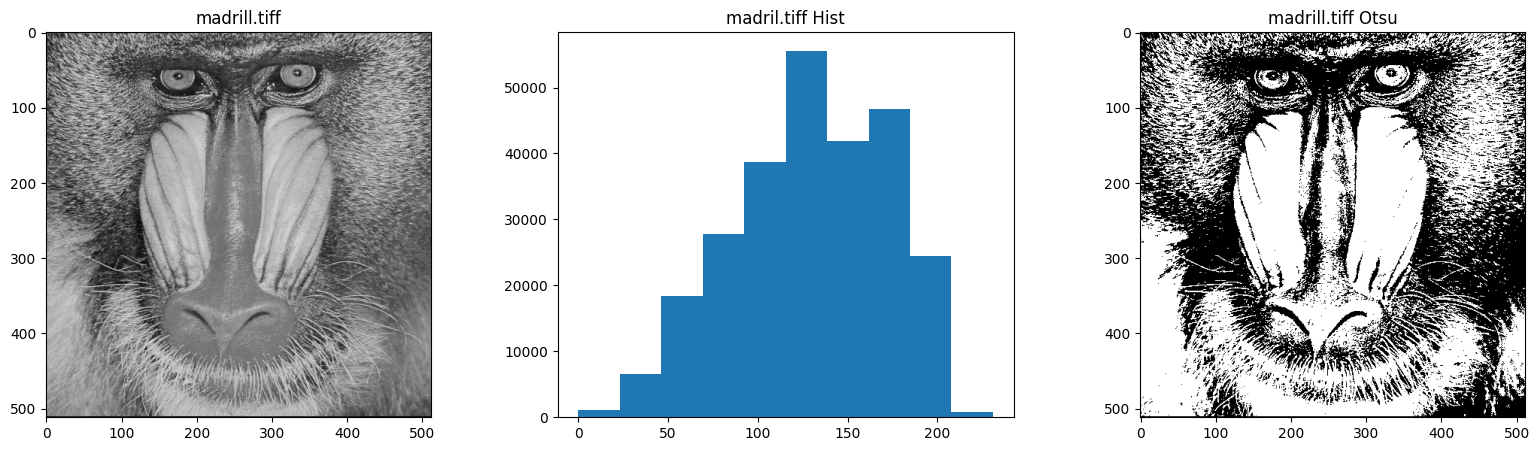

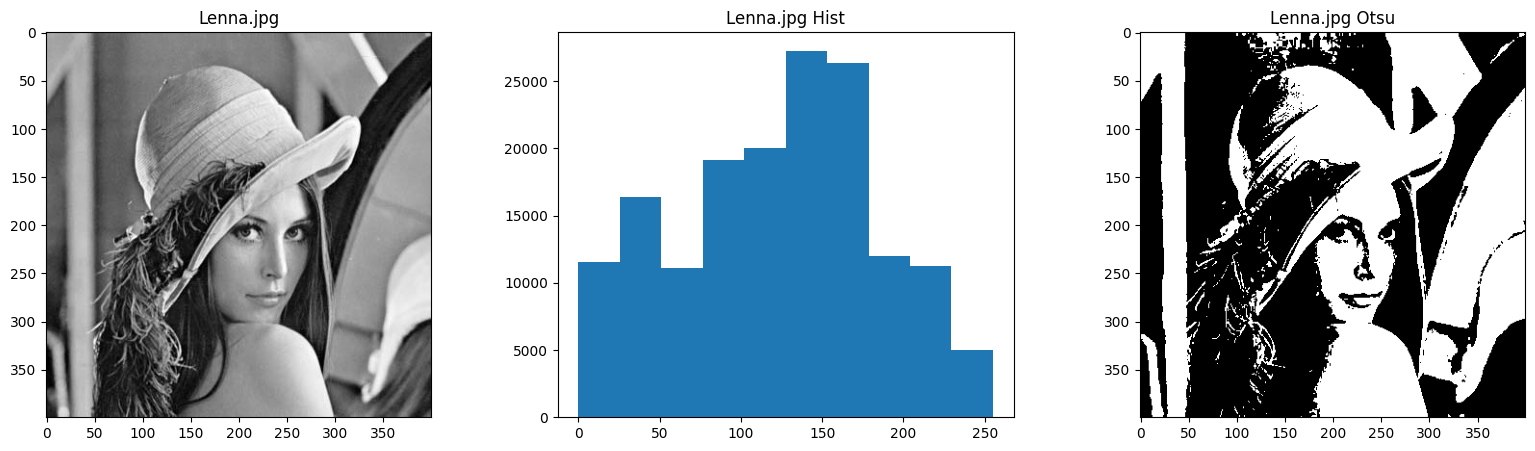

In [86]:
# Para primeira imagem
img1 = cv2.imread("HE.jpg", cv2.IMREAD_GRAYSCALE)
# 165 foi descoberto olhando o hist da img
k_img1 = otsu(img1, 165)
img1Otsu = img1.copy()
img1Otsu[img1Otsu >= k_img1] = 255
img1Otsu[img1Otsu < k_img1] = 0

print('Threshhold HE:',k_img1)
plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.title('HE.jpg')
plt.subplot(1,3,2)
plt.hist(img1.flatten())
plt.title('HE.jpg Hist')
plt.subplot(1,3,3)
plt.imshow(img1Otsu, cmap='gray', vmin=0, vmax=255)
plt.title('HE.jpg Otsu')

# Para segunda imagem
img2 = cv2.imread("madrill.tiff", cv2.IMREAD_GRAYSCALE)
# 125 foi descoberto olhando o hist da img
k_img2 = otsu(img2, 125)
img2Otsu = img2.copy()
img2Otsu[img2Otsu >= k_img2] = 255
img2Otsu[img2Otsu < k_img2] = 0

print('Threshhold madrill:',k_img2)
plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.title('madrill.tiff')
plt.subplot(1,3,2)
plt.hist(img2.flatten())
plt.title('madril.tiff Hist')
plt.subplot(1,3,3)
plt.imshow(img2Otsu, cmap='gray', vmin=0, vmax=255)
plt.title('madrill.tiff Otsu')

# Para terceira imagem
img3 = cv2.imread("Lenna.jpg", cv2.IMREAD_GRAYSCALE)
# 135 foi descoberto olhando o hist da img
k_img3 = otsu(img3, 135)
img3Otsu = img3.copy()
img3Otsu[img3Otsu >= k_img3] = 255
img3Otsu[img3Otsu < k_img3] = 0

print('Threshhold Lenna:',k_img3)
plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)
plt.title('Lenna.jpg')
plt.subplot(1,3,2)
plt.hist(img3.flatten())
plt.title('Lenna.jpg Hist')
plt.subplot(1,3,3)
plt.imshow(img3Otsu, cmap='gray', vmin=0, vmax=255)
plt.title('Lenna.jpg Otsu')